<a href="https://colab.research.google.com/github/M27urodkhon/Semantic-Segmentation/blob/main/SemanticSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install fastai==2.5.3

*Kutubxonalarni tekshirib olish*

In [ ]:
# kutubxonalarni yuklab olish
import torch
import fastai

# Versiyalarini tekshirish
print(torch.__version__)
print(fastai.__version__)


1.10.2+cu102
2.5.3


## Semantic Segmentation

# O'zi yurar avtomabillar uchun juda ham muhim bo'lgan rasmdagi turli xil obyektlarni ajrata olish *`(semantic segmentation)`* texnologiyasini modelini qurib ko'ramiz. Ya'ni modelimiz rasmdagi turli xil obyeklarni ajratib ularni turli xil ranglarda ko'rsatadi.

Buning uchun biz *`Semantic object classes in video: A high-definition ground truth database`* ilmiy maqolada qo'llanilgan datasetdan foydalanamiz.

# Yanada yaxshiroq tasavvurga ega bo'lish uchun quyidagi rasmga e'tibor bering.

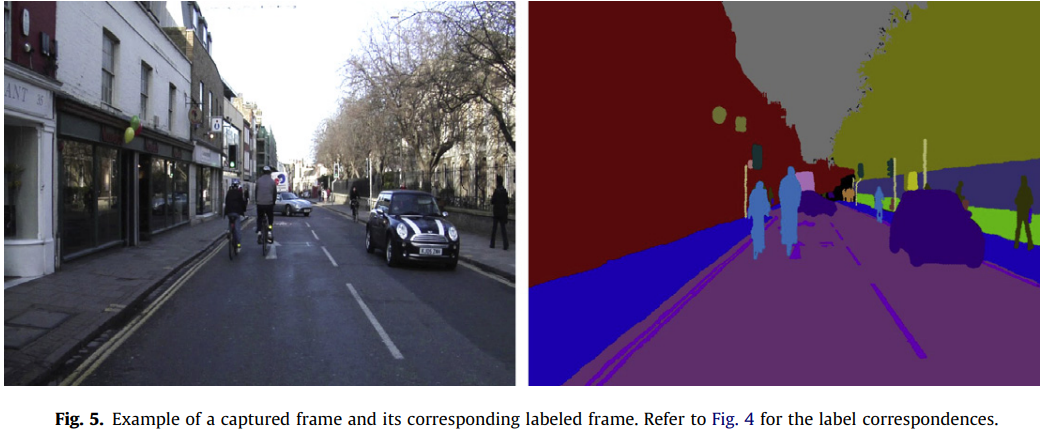

In [ ]:
from fastai.vision.all import *
import numpy as np

path = untar_data(URLs.CAMVID_TINY)

#path.ls()

# label getter funksiya
def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}'

# dataloaders
dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames=get_image_files(path/'images'), 
                                              label_func= label_getter, codes=np.loadtxt(path/'codes.txt', dtype=str))

#fine-tuning
learn = unet_learner(dls, resnet34)
learn.fine_tune(12)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,2.532807,2.404101,01:10


epoch,train_loss,valid_loss,time
0,1.871286,1.591549,01:17
1,1.610164,1.365446,01:16
2,1.433811,1.105526,01:15
3,1.314213,1.192417,01:15
4,1.199614,0.878225,01:15
5,1.099316,0.759481,01:15
6,0.999291,0.702804,01:15
7,0.910347,0.684665,01:15
8,0.831853,0.648281,01:18
9,0.766766,0.639250,01:15


In [ ]:
!ls /root/.fastai/data/camvid_tiny/labels

0001TP_006750_P.png  0016E5_01500_P.png  0016E5_08550_P.png
0001TP_006840_P.png  0016E5_01920_P.png  Seq05VD_f00000_P.png
0001TP_007500_P.png  0016E5_02250_P.png  Seq05VD_f00090_P.png
0001TP_007860_P.png  0016E5_05190_P.png  Seq05VD_f00210_P.png
0001TP_008070_P.png  0016E5_05310_P.png  Seq05VD_f00420_P.png
0001TP_008160_P.png  0016E5_05730_P.png  Seq05VD_f00480_P.png
0001TP_008400_P.png  0016E5_05940_P.png  Seq05VD_f00810_P.png
0001TP_008580_P.png  0016E5_06090_P.png  Seq05VD_f00990_P.png
0001TP_008670_P.png  0016E5_06240_P.png  Seq05VD_f01080_P.png
0001TP_008700_P.png  0016E5_06300_P.png  Seq05VD_f01260_P.png
0001TP_008760_P.png  0016E5_06570_P.png  Seq05VD_f01320_P.png
0001TP_008940_P.png  0016E5_06810_P.png  Seq05VD_f01440_P.png
0001TP_009000_P.png  0016E5_06870_P.png  Seq05VD_f01830_P.png
0001TP_009150_P.png  0016E5_06990_P.png  Seq05VD_f01890_P.png
0001TP_009360_P.png  0016E5_07290_P.png  Seq05VD_f01950_P.png
0001TP_009840_P.png  0016E5_07973_P.png  Seq05VD_f02070_P.png
0001TP_009

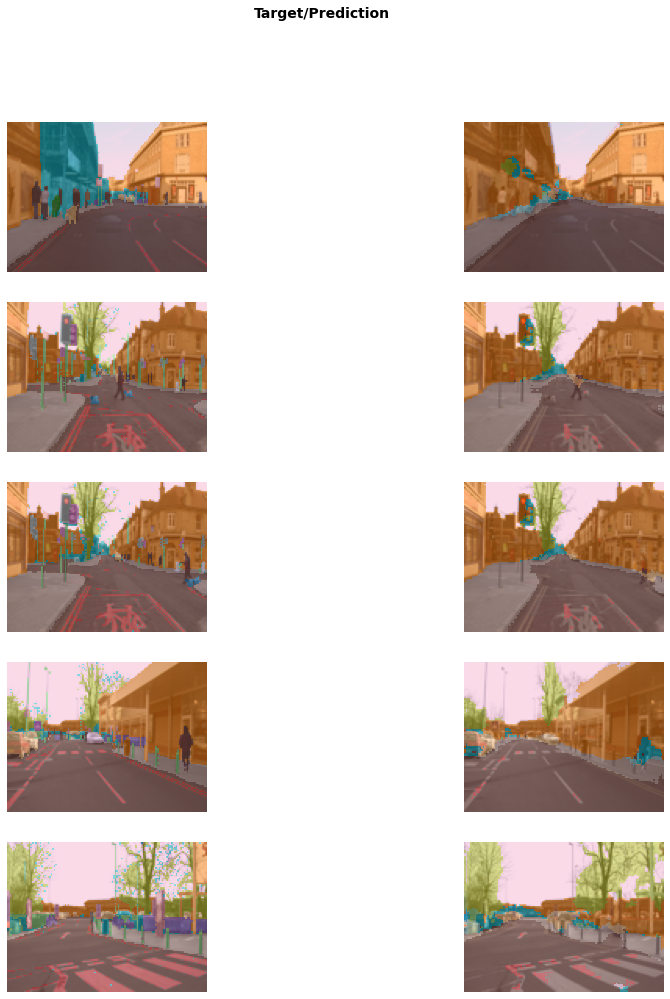

In [ ]:
learn.show_results(max_n=5, figsize=(15, 16))